In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [28]:
data =pd.read_csv("https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/Intel%20Data/Ames_Housing_Sales.csv")
data.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0


In [29]:
features=data.drop("SalePrice",axis=1)
features

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,WD,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,...,WD,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,...,WD,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,None,2,1Fam,TA,Mn,49.0,1029.0,...,WD,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010


In [30]:
num_col=features.columns[features.dtypes!=object]
num_col

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [31]:
# Separate the Target and Features
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

###  Separate the Target and Features

In [32]:
num_features =features[num_col]
num_features

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [33]:
target = data["SalePrice"]
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

In [34]:
data.nunique()

1stFlrSF        738
2ndFlrSF        401
3SsnPorch        20
Alley             3
BedroomAbvGr      7
               ... 
WoodDeckSF      267
YearBuilt       109
YearRemodAdd     61
YrSold            5
SalePrice       640
Length: 80, dtype: int64

In [35]:
data.isnull().sum().sum()

0

### Create a new DataFrame with numerical columns only from features.

### Calculate the statistical values for all the numerical columns.

In [36]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


### Plot the histogram for Sales column i.e Target

(array([105., 692., 367., 134.,  52.,  18.,   4.,   3.,   2.,   2.]),
 array([ 35311. , 107279.9, 179248.8, 251217.7, 323186.6, 395155.5,
        467124.4, 539093.3, 611062.2, 683031.1, 755000. ]),
 <a list of 10 Patch objects>)

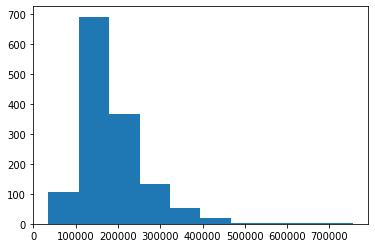

In [37]:
plt.hist(data["SalePrice"])

### Plot the histogram and Boxplot for all the numerical columns

- Observe the histograms and apply np.log or np.log1p for the  Skewed data
- Observe the Boxplots and identify features with outliers



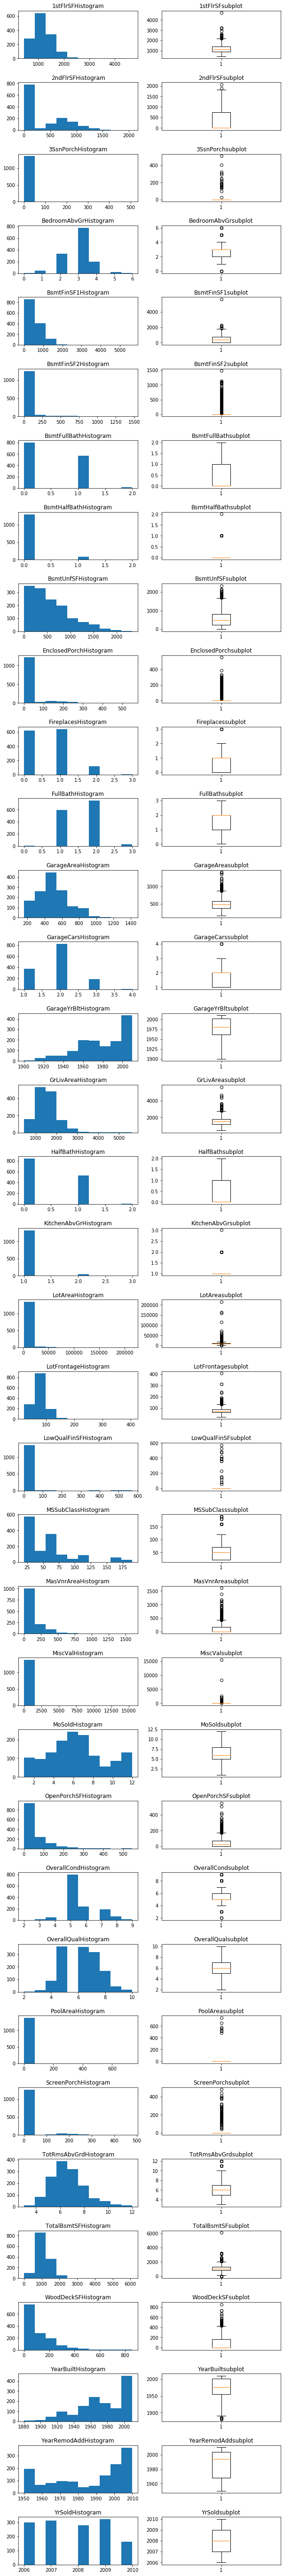

In [38]:
plt.figure(figsize=(10,100))
plt.subplots_adjust(hspace=0.5)
for i in range((len(num_col))):
    plt.subplot(36,2,2*i+1)
    plt.hist(data[num_col[i]])
    plt.title(num_col[i]+"Histogram")
    plt.subplot(36,2,2*i+2)
    plt.boxplot(data[num_col[i]])
    plt.title(num_col[i]+"subplot")

In [39]:
# Observe the histograms and apply np.log or np.log1p for the Skewed data
a = np.log1p(features[num_col])
a

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,6.561031,0.000000,0.693147,0.000000,5.017280,0.000000,...,1.791759,2.079442,0.0,0.0,2.197225,6.753438,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,1.386294,6.886532,0.000000,0.000000,0.693147,5.652489,0.000000,...,2.197225,1.945910,0.0,0.0,1.945910,7.141245,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,1.386294,6.188264,0.000000,0.693147,0.000000,6.075346,0.000000,...,1.791759,2.079442,0.0,0.0,1.945910,6.825460,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,1.386294,5.379897,0.000000,0.693147,0.000000,6.293419,5.609472,...,1.791759,2.079442,0.0,0.0,2.079442,6.629363,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,1.609438,6.486161,0.000000,0.693147,0.000000,6.196444,0.000000,...,1.791759,2.197225,0.0,0.0,2.302585,7.044033,5.262690,7.601402,7.601402,7.605392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,6.860664,6.543912,0.0,1.386294,0.000000,0.000000,0.000000,0.000000,6.860664,0.000000,...,1.791759,1.945910,0.0,0.0,2.079442,6.860664,0.000000,7.600902,7.601402,7.604894
1375,7.637234,0.000000,0.0,1.386294,6.673298,5.099866,0.693147,0.000000,6.380123,0.000000,...,1.945910,1.945910,0.0,0.0,2.079442,7.341484,5.857933,7.590347,7.595387,7.606387
1376,7.080868,7.050123,0.0,1.609438,5.620401,0.000000,0.000000,0.000000,6.777647,0.000000,...,2.302585,2.079442,0.0,0.0,2.302585,7.050123,0.000000,7.571474,7.604396,7.606387
1377,6.983790,0.000000,0.0,1.098612,3.912023,6.937314,0.693147,0.000000,0.000000,4.727388,...,1.945910,1.791759,0.0,0.0,1.791759,6.983790,5.905362,7.576097,7.599401,7.606387


In [40]:
a

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,6.561031,0.000000,0.693147,0.000000,5.017280,0.000000,...,1.791759,2.079442,0.0,0.0,2.197225,6.753438,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,1.386294,6.886532,0.000000,0.000000,0.693147,5.652489,0.000000,...,2.197225,1.945910,0.0,0.0,1.945910,7.141245,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,1.386294,6.188264,0.000000,0.693147,0.000000,6.075346,0.000000,...,1.791759,2.079442,0.0,0.0,1.945910,6.825460,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,1.386294,5.379897,0.000000,0.693147,0.000000,6.293419,5.609472,...,1.791759,2.079442,0.0,0.0,2.079442,6.629363,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,1.609438,6.486161,0.000000,0.693147,0.000000,6.196444,0.000000,...,1.791759,2.197225,0.0,0.0,2.302585,7.044033,5.262690,7.601402,7.601402,7.605392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,6.860664,6.543912,0.0,1.386294,0.000000,0.000000,0.000000,0.000000,6.860664,0.000000,...,1.791759,1.945910,0.0,0.0,2.079442,6.860664,0.000000,7.600902,7.601402,7.604894
1375,7.637234,0.000000,0.0,1.386294,6.673298,5.099866,0.693147,0.000000,6.380123,0.000000,...,1.945910,1.945910,0.0,0.0,2.079442,7.341484,5.857933,7.590347,7.595387,7.606387
1376,7.080868,7.050123,0.0,1.609438,5.620401,0.000000,0.000000,0.000000,6.777647,0.000000,...,2.302585,2.079442,0.0,0.0,2.302585,7.050123,0.000000,7.571474,7.604396,7.606387
1377,6.983790,0.000000,0.0,1.098612,3.912023,6.937314,0.693147,0.000000,0.000000,4.727388,...,1.945910,1.791759,0.0,0.0,1.791759,6.983790,5.905362,7.576097,7.599401,7.606387


In [41]:
# Apply MinMaxScaler on the data
from sklearn.preprocessing import MinMaxScaler

In [42]:
sc=MinMaxScaler()
sc.fit(a)
num_features_sc = pd.DataFrame(sc.transform(a),columns = a.columns)
num_features_sc

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.282333,0.884420,0.0,0.712414,0.759508,0.000000,0.63093,0.00000,0.646838,0.000000,...,0.575717,0.754900,0.0,0.0,0.688013,0.774668,0.000000,0.947823,0.884882,0.500249
1,0.446011,0.000000,0.0,0.712414,0.797188,0.000000,0.00000,0.63093,0.728731,0.000000,...,0.912489,0.652127,0.0,0.0,0.474792,0.819153,0.843935,0.744846,0.437057,0.250187
2,0.312730,0.886245,0.0,0.712414,0.716357,0.000000,0.63093,0.00000,0.783246,0.000000,...,0.575717,0.754900,0.0,0.0,0.474792,0.782930,0.000000,0.932882,0.868404,0.500249
3,0.331113,0.868471,0.0,0.712414,0.622780,0.000000,0.63093,0.00000,0.811361,0.888227,...,0.575717,0.754900,0.0,0.0,0.588083,0.760436,0.000000,0.275872,0.336710,0.000000
4,0.404981,0.911832,0.0,0.827087,0.750841,0.000000,0.63093,0.00000,0.798858,0.000000,...,0.575717,0.845553,0.0,0.0,0.777404,0.808002,0.779126,0.925405,0.835423,0.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.327588,0.857277,0.0,0.712414,0.000000,0.000000,0.00000,0.00000,0.884491,0.000000,...,0.575717,0.652127,0.0,0.0,0.588083,0.786968,0.000000,0.917925,0.835423,0.250187
1375,0.655348,0.000000,0.0,0.712414,0.772504,0.698955,0.63093,0.00000,0.822539,0.000000,...,0.703752,0.652127,0.0,0.0,0.588083,0.842121,0.867250,0.759976,0.636841,1.000000
1376,0.420528,0.923592,0.0,0.827087,0.650620,0.000000,0.00000,0.00000,0.873788,0.000000,...,1.000000,0.754900,0.0,0.0,0.777404,0.808700,0.000000,0.477563,0.934267,1.000000
1377,0.379555,0.000000,0.0,0.564575,0.452858,0.950784,0.63093,0.00000,0.000000,0.748554,...,0.703752,0.533484,0.0,0.0,0.344007,0.801091,0.874272,0.546750,0.769361,1.000000


- Create train and test splits of both data sets. To ensure the data gets split the same way, - use the same random_state in each of the two splits.
-  For the data set, fit a basic linear regression model on the training data.
-  Calculate the mean squared error on both the train and test sets.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train_sc,x_test_sc,y_train_sc,y_test_sc = train_test_split(num_features_sc,target,random_state =44)
print(x_train_sc.shape)
print(x_test_sc.shape)
print(y_train_sc.shape)
print(y_test_sc.shape)

(1034, 36)
(345, 36)
(1034,)
(345,)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR=LinearRegression()
LR.fit(x_train_sc,y_train_sc)
y_pred = LR.predict(x_train_sc)
print('training',mean_squared_error(y_pred,y_train_sc))
y_pred = LR.predict(x_test_sc)
print('testing',mean_squared_error(y_pred,y_test_sc))

training 1215588547.1631784
testing 2110723251.660744


In [46]:
# For the data set, fit KNeighnorRegressor model on the training data. 
# Calculate the mean squared error on both the train and test sets.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor()
knn.fit(x_train_sc,y_train_sc)
y_pred = knn.predict(x_train_sc)
print('training',mean_squared_error(y_pred,y_train_sc))
y_pred = knn.predict(x_test_sc)
print('testing',mean_squared_error(y_pred,y_test_sc))

training 1302835495.0892456
testing 2490369826.0403476


In [47]:
#  For The data set, Fit KNeighnorRegressor model on the training data with neighbors ranging from 2 to 15 with interval 2.
# Create a dictionary with keys as neighbors numbers. Values as list where first element in the list is mean squared error for train data, second element in the list is mean squared error for train data

k_errors ={}
for i in range(3,25,2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_sc,y_train_sc)
    y_pred = knn.predict(x_train_sc)
    #print('training',mean_squared_error(y_pred,y_train))
    k_errors[i]= [mean_squared_error(y_pred,y_train_sc)]
    y_pred = knn.predict(x_test_sc)
    k_errors[i].append(mean_squared_error(y_pred,y_test_sc))
k_errors

{3: [1105785137.2014828, 2503133397.7694035],
 5: [1302835495.0892456, 2490369826.0403476],
 7: [1459463049.6488175, 2356272907.2725224],
 9: [1505887548.6266925, 2423057731.945643],
 11: [1595059131.1360202, 2451464619.7419815],
 13: [1635981294.1394708, 2484222518.0242515],
 15: [1685081359.3965871, 2479592426.319253],
 17: [1723899710.820876, 2537977651.82385],
 19: [1760411497.4052892, 2567359741.4877753],
 21: [1802590654.7938876, 2628257838.57369],
 23: [1819143835.1755657, 2637285838.9857097]}

####  Plot a curve by taking neighbors on X axis and Error on Y axis.

([<matplotlib.axis.XTick at 0x1eeed66b7c8>,
 <a list of 22 Text xticklabel objects>)

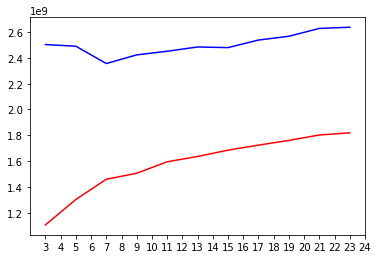

In [48]:
# Plot the curve for training data error
# Plot the curve test data error

plt.plot(list(k_errors.keys()),[x[0] for x in k_errors.values()],'r')
plt.plot(list(k_errors.keys()),[x[1] for x in k_errors.values()],'b')
plt.xticks(range(3,25))

In [49]:
# Observe the graph and identify how many number of neighbors is the best for this data


-    Calculate the cross validation score with cv=4,KNN model for training data
-   Use the above selected number of neighbors for KNN

In [50]:
from sklearn.model_selection import cross_val_score
knn1 = KNeighborsRegressor(n_neighbors=8)
cross_val_score(knn1,x_train_sc,y_train_sc,cv=4)

array([0.65019742, 0.60651339, 0.71749334, 0.73626637])

- Calculate the cross validation score with cv=4,LinearRegressor model for training data


In [51]:
LR1 = LinearRegression()
cross_val_score(LR1,x_train_sc,y_train_sc,cv=4)

array([0.72051024, 0.79562189, 0.80371718, 0.80397298])

## RIDGE REGRESION

In [57]:
from sklearn.linear_model import Ridge

In [58]:
RR =Ridge

In [59]:
RR = RR.fit()
y_predict = RR.predict()

TypeError: fit() missing 1 required positional argument: 'y'